<a href="https://colab.research.google.com/github/chosunme96/ICCFinal/blob/master/%ED%86%B5%EB%8D%B0%EB%B6%844%EC%A1%B0_%EB%B6%80%EB%8F%99%EC%82%B0_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주제 요약**
## 거시경제 지표에 따른 부동산 가격 변화 예측 <br>
서강대학교 정보통신대학원 <br> 통계기반 데이터분석 2반 4조 <br>
팀원 : 박준우, 이시용, 이예빈, 이형준, 조선미 <br>

# **분석 개요**

## 1부
*   Raw Data 수집 
*   데이터 지수화/정규화
*   데이터 불러오기 및 EDA
*   상관분석
*   독립변수 선정(변수 중요도 평가)
*   최종 독립변수 선정

## 2부
*   단위근 검정
*   시계열 데이터 로그변환, 차분
*   VAR Forecasting
*   그래인저 인과분석
*   충격반응 모형
*   예측오차 분산분해
*   향후 추세 예측 (ARIMA)


# 1부. **데이터 전처리 및 독립변수 선정**

## 데이터 불러오기 및 EDA
Raw Data수집및 데이터 지수화/정규화 진행한 데이터 셋으로 EDA 및 결측치 확인/제거 진행함. <br>
데이터 전처리에 대한 상세한 내용은 발표자료 참고.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 데이터 불러오기- 디렉토리에 맞도록 경로 재설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/통데분 4조/통데분4조_기말발표_제출/dataset.xlsx')

In [ ]:
# 데이터 확인 
df.head()

,DATE,Price_ALL,Price_Seoul,Loan_ALL,Loan_Seoul,CD,CP,Nation_1Y,Nation_3Y,CO_AA,...,M1_MMF,M2_M,LF_M,M1_M_S,M2_M_S,LF_M_S,bank_M,Bank_In_M,Bank_Loan_M,DTR
0,2000-01-01,NaN,NaN,NaN,NaN,7.28,7.78,NaN,9.28,10.25,...,18.672948,26.844515,24.177554,20.543349,26.796492,24.196348,24.874485,26.135474,16.871504,49.7
1,2000-02-01,NaN,NaN,NaN,NaN,7.13,7.56,8.53,8.99,10.01,...,18.737709,26.900789,24.335645,20.663066,26.911157,24.328225,25.798190,27.219310,17.161343,51.6
2,2000-03-01,NaN,NaN,NaN,NaN,7.00,7.43,8.35,9.06,10.00,...,18.983678,27.151579,24.577288,21.247620,27.220404,24.541565,26.479139,28.055024,17.545484,56.1
3,2000-04-01,NaN,NaN,NaN,NaN,7.06,7.46,8.34,8.95,9.97,...,19.480079,27.317112,24.764142,22.116646,27.385462,24.748866,27.189532,28.809302,18.113707,47.1
4,2000-05-01,NaN,NaN,NaN,NaN,7.14,7.53,8.34,8.96,9.91,...,19.357676,27.236047,24.829519,22.205032,27.351161,24.887098,27.737030,29.440154,18.659534,50.2


In [ ]:
# 데이터 shape 파악
df.shape

(272, 42)

In [ ]:
# 데이터 통계량 파악
df.describe()

,Price_ALL,Price_Seoul,Loan_ALL,Loan_Seoul,CD,CP,Nation_1Y,Nation_3Y,CO_AA,CO_BBB,...,M1_MMF,M2_M,LF_M,M1_M_S,M2_M_S,LF_M_S,bank_M,Bank_In_M,Bank_Loan_M,DTR
count,194.000000,195.000000,221.000000,221.000000,268.000000,268.000000,267.000000,268.000000,268.000000,259.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,91.675773,96.162051,79.712304,77.624408,3.209366,3.451828,3.271270,3.571978,4.331369,9.209452,...,63.088588,69.700296,67.779437,64.126715,69.806303,67.827843,70.696233,72.168303,68.804609,27.640824
std,16.290351,28.744645,18.851239,20.280105,1.662982,1.723849,1.739965,1.829471,2.034930,1.215938,...,38.135693,32.098136,32.730961,36.596103,32.144856,32.751390,31.657584,29.932946,32.299714,8.304095
min,62.800000,61.000000,50.749450,47.337304,0.630000,0.970000,0.611000,0.826000,1.645000,7.720000,...,18.672948,26.844515,24.177554,20.543349,26.796492,24.196348,24.874485,26.135474,16.871504,13.700000
25%,80.425000,78.500000,60.373207,57.977674,1.650000,1.820000,1.748500,1.923750,2.350250,8.330000,...,33.662568,39.915662,38.738421,37.045093,39.987566,38.769984,42.571477,44.634767,39.450376,20.600000
50%,87.300000,83.900000,81.462378,75.126526,2.870000,3.100000,3.090000,3.520000,4.245000,8.740000,...,51.598906,66.615871,61.142177,51.296231,66.680186,61.098060,68.340737,72.455026,66.349888,26.800000
75%,99.875000,105.250000,97.472411,98.124341,4.540000,4.750000,4.655000,4.870000,5.542500,10.035000,...,91.088843,94.384754,93.128834,90.753019,94.516469,93.222588,93.354538,94.011394,93.729168,33.150000
max,142.300000,180.100000,111.481384,111.276184,7.280000,7.780000,8.530000,9.280000,10.250000,12.620000,...,167.587627,145.615832,142.679691,164.957151,145.460330,142.304955,146.787406,138.431015,138.020713,56.100000


In [ ]:
# 서울 아파트 매매가(종속변수) 기준으로 null값 제거 - 종속변수가 존재하는 데이터에 대해서만 분석 진행
temp = df[df['Price_Seoul'].notnull()] 
temp.head()

,DATE,Price_ALL,Price_Seoul,Loan_ALL,Loan_Seoul,CD,CP,Nation_1Y,Nation_3Y,CO_AA,...,M1_MMF,M2_M,LF_M,M1_M_S,M2_M_S,LF_M_S,bank_M,Bank_In_M,Bank_Loan_M,DTR
72,2006-01-01,62.8,61.0,54.392654,50.844030,4.15,4.39,4.62,5.02,5.50,...,36.195650,40.752755,39.723148,38.962253,40.796455,39.697014,42.608953,44.190447,41.031624,23.3
73,2006-02-01,63.5,62.2,54.730642,51.344379,4.25,4.46,4.57,4.87,5.33,...,35.932448,41.030911,39.986245,39.256800,41.079351,40.038176,42.508481,44.154639,41.295866,21.6
74,2006-03-01,64.1,63.7,55.228769,52.131986,4.27,4.45,4.57,4.93,5.30,...,35.637472,41.331559,40.137772,39.185761,41.252861,40.161780,42.492586,44.152842,41.651929,23.7
75,2006-04-01,64.7,64.7,55.584530,52.749622,4.33,4.48,4.61,4.95,5.24,...,35.564125,41.581580,40.368968,39.261911,41.557573,40.456511,42.652691,44.261118,42.205477,21.3
76,2006-05-01,65.1,65.1,55.890792,53.070661,4.36,4.50,4.59,4.78,5.05,...,35.554377,41.869345,40.633115,39.564045,41.976278,40.765228,42.765415,44.369567,42.728846,22.8


Text(0.5, 1.0, 'Total Missing Value (%)')

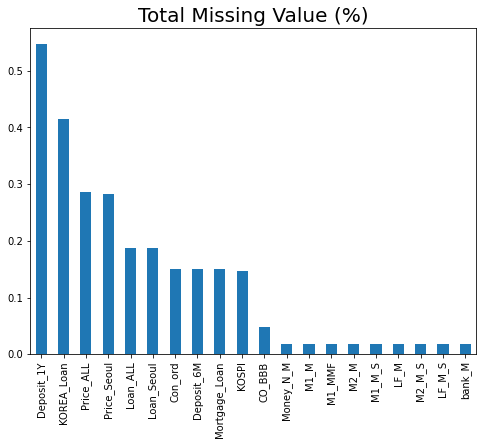

In [ ]:
# 결측치 시각화

total = temp.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [ ]:
# 결측치 비율 파악
sort = pd.DataFrame(data=temp.isnull().sum()/len(temp),columns=['nan_ratio'])
sort2 = sort.sort_values('nan_ratio', ascending=False)
sort2.head(10)

,nan_ratio
KOREA_Loan,0.553846
Deposit_1Y,0.379487
Price_ALL,0.005128
CPI_total,0.000000
CPI_living,0.000000
LFP,0.000000
UR,0.000000
ER,0.000000
KOSPI,0.000000
money_M,0.000000


In [ ]:
# Price_Seoul 기준으로 분석하기 때문에 Price_ALL 전체가격컬럼 제거 / 결측치가 많은 컬럼 제거
temp2 = temp.drop(['Price_ALL','KOREA_Loan','Deposit_1Y','ALL_IP','Con_ord'], axis=1)

## 상관분석
본격적으로 EDA 및 데이터 전처리를 하기에 앞서, 변수간 상관관계 분석

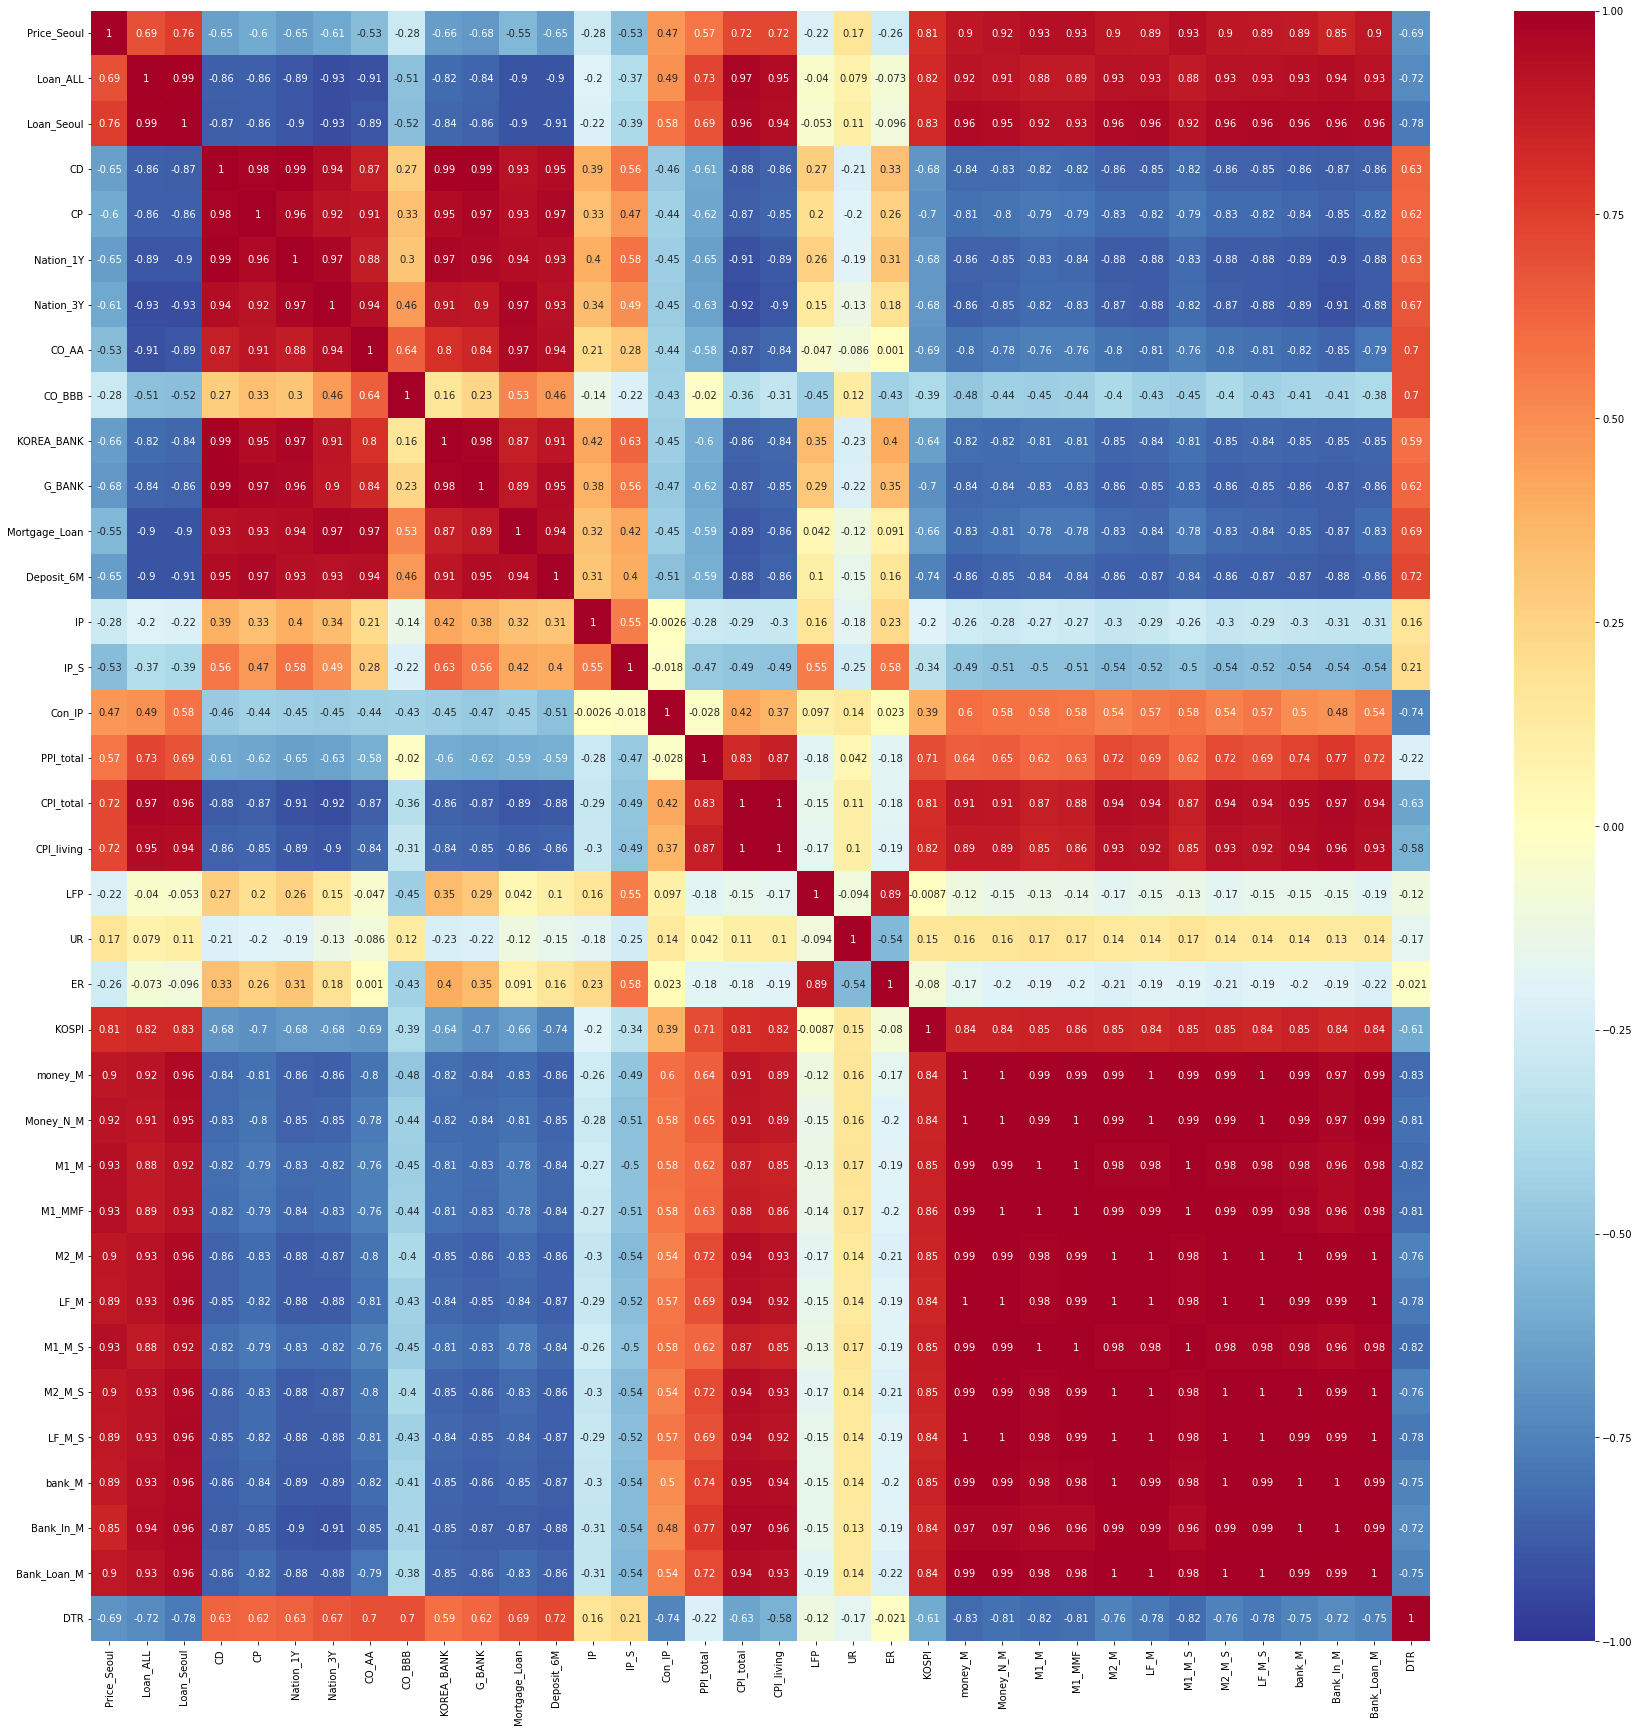

In [ ]:
# 상관관계 분석
fig = plt.figure(figsize=(30, 30))
discrete_col = temp2.dtypes[temp2.dtypes != 'object'].index
sns.heatmap(temp2[discrete_col].corr(), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시

               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

## 독립변수 선정(변수 중요도 평가)

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

In [ ]:
temp2.set_index('DATE', inplace = True)

In [ ]:
# X,Y 구분
x_data = temp2.iloc[:, 1:]
y_data = temp2.iloc[:, :1]

In [ ]:
# 독립변수 데이터 요약 출력
x_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195 entries, 2006-01-01 to 2022-03-01
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Loan_ALL       195 non-null    float64
 1   Loan_Seoul     195 non-null    float64
 2   CD             195 non-null    float64
 3   CP             195 non-null    float64
 4   Nation_1Y      195 non-null    float64
 5   Nation_3Y      195 non-null    float64
 6   CO_AA          195 non-null    float64
 7   CO_BBB         195 non-null    float64
 8   KOREA_BANK     195 non-null    float64
 9   G_BANK         195 non-null    float64
 10  Mortgage_Loan  195 non-null    float64
 11  Deposit_6M     195 non-null    float64
 12  IP             195 non-null    float64
 13  IP_S           195 non-null    float64
 14  Con_IP         195 non-null    float64
 15  PPI_total      195 non-null    float64
 16  CPI_total      195 non-null    float64
 17  CPI_living     195 non-null    floa

In [ ]:
# 종속변수 데이터 요약 출력
y_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195 entries, 2006-01-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price_Seoul  195 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [ ]:
# 컬렴명 list
col_list = list(x_data.columns)

In [ ]:
# 종속변수(서울 아파트 매매가격 수치화)
y_data = y_data.astype({'Price_Seoul':'int'})

In [ ]:
# 변수 선정을 위한 모델링
def clf(x, y, col_list):
    # Desion tree
    dt = DecisionTreeClassifier(max_depth=8, random_state=99, criterion = "entropy", max_features='auto')
    dt.fit(x,y)
    result_dt = permutation_importance(dt, x, y, n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_dt = result_dt.importances_mean.argsort()
    importances_df = pd.DataFrame(result_dt.importances_mean[sorted_idx_dt], index=x.columns[sorted_idx_dt]).sort_values(0, ascending=False).iloc[:45]

    # random forest
    rfc = RandomForestClassifier(max_depth=8, random_state=99, criterion = "entropy",n_estimators = 3, max_features='auto')
    rfc.fit(x, y)
    result_rfc = permutation_importance(rfc, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_rfc = result_rfc.importances_mean.argsort()
    importances_rf = pd.DataFrame(result_rfc.importances_mean[sorted_idx_rfc], index=x.columns[sorted_idx_rfc]).sort_values(0, ascending=False).iloc[:45]
    
    # gradient boosting
    gb = GradientBoostingClassifier(criterion='friedman_mse',loss='deviance', max_depth=8, n_estimators=30, random_state=99, max_features='auto')
    gb.fit(x, y)
    result_gb = permutation_importance(gb, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_gb = result_gb.importances_mean.argsort()
    importances_gb = pd.DataFrame(result_gb.importances_mean[sorted_idx_gb], index=x.columns[sorted_idx_gb]).sort_values(0, ascending=False).iloc[:45]
    
    # xg boosting
    xg = XGBClassifier(booster='gbtree', max_depth=8,  gamma=0.5, learning_rate=0.03, n_estimators=3, random_state=99)
    xg.fit(x, y)
    result_xg = permutation_importance(xg, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_xg = result_xg.importances_mean.argsort()
    importances_xg = pd.DataFrame(result_xg.importances_mean[sorted_idx_xg], index=x.columns[sorted_idx_xg]).sort_values(0, ascending=False).iloc[:45]
 
    return importances_df, importances_rf, importances_gb,importances_xg

In [ ]:
dt_list, rfc_list, gb_list, xg_list = clf(x_data, y_data, col_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

### Decision Tree 결과 출력

In [ ]:
print(dt_list)

                      0
Loan_Seoul     0.462051
G_BANK         0.344103
M1_M_S         0.304615
KOSPI          0.170256
M1_MMF         0.162564
LF_M_S         0.150769
PPI_total      0.147179
CPI_total      0.145641
M2_M           0.106667
UR             0.105641
CD             0.104103
CPI_living     0.103590
Nation_3Y      0.094359
DTR            0.083077
CO_BBB         0.071795
Loan_ALL       0.065641
Mortgage_Loan  0.060513
IP             0.054359
Con_IP         0.042564
bank_M         0.040000
M2_M_S         0.038462
LFP            0.037436
Nation_1Y      0.029744
ER             0.028205
CO_AA          0.018462
money_M        0.014872
Bank_Loan_M    0.014359
M1_M           0.010769
IP_S           0.007692
CP             0.005641
LF_M           0.000000
Deposit_6M     0.000000
Bank_In_M      0.000000
Money_N_M      0.000000
KOREA_BANK     0.000000


### Random Forest 결과 출력

In [ ]:
print(rfc_list)

                      0
M1_MMF         0.163590
M2_M           0.134359
LF_M_S         0.123077
Mortgage_Loan  0.119487
LFP            0.117436
G_BANK         0.116923
M1_M_S         0.115385
bank_M         0.113333
Deposit_6M     0.103590
KOSPI          0.100513
CPI_living     0.099487
PPI_total      0.081538
IP_S           0.079487
CO_BBB         0.076923
Bank_In_M      0.068205
IP             0.064103
UR             0.060000
M2_M_S         0.053846
M1_M           0.046154
Money_N_M      0.028718
Loan_Seoul     0.027692
money_M        0.025128
CO_AA          0.022564
Nation_3Y      0.018974
ER             0.018462
Loan_ALL       0.018462
CPI_total      0.016410
Bank_Loan_M    0.016410
LF_M           0.016410
CP             0.015897
Con_IP         0.015385
CD             0.015385
Nation_1Y      0.013846
DTR            0.005641
KOREA_BANK     0.000000


### Gradient Boosting 결과 출력

In [ ]:
print(gb_list)

                      0
Con_IP         0.196410
CO_BBB         0.140513
DTR            0.108718
PPI_total      0.103590
Nation_1Y      0.076923
CD             0.072308
Deposit_6M     0.061026
M1_M           0.058974
Mortgage_Loan  0.052308
LFP            0.049231
CP             0.043590
IP_S           0.043590
UR             0.041538
CO_AA          0.029231
KOSPI          0.028205
G_BANK         0.028205
Nation_3Y      0.024103
CPI_living     0.022564
IP             0.021026
Loan_Seoul     0.018462
M1_MMF         0.018462
ER             0.018462
LF_M           0.015385
CPI_total      0.014872
Money_N_M      0.012308
M1_M_S         0.004615
LF_M_S         0.000513
Bank_In_M      0.000513
M2_M_S         0.000000
M2_M           0.000000
Bank_Loan_M    0.000000
money_M        0.000000
KOREA_BANK     0.000000
bank_M         0.000000
Loan_ALL       0.000000


### XG Boosting 결과 출력

In [ ]:
print(xg_list)

                      0
DTR            0.090256
G_BANK         0.081026
PPI_total      0.076923
LFP            0.074359
Con_IP         0.045128
UR             0.025128
money_M        0.025128
Nation_3Y      0.017436
IP             0.013846
Loan_ALL       0.011795
IP_S           0.011282
CO_AA          0.009744
Loan_Seoul     0.008718
CPI_total      0.008205
Money_N_M      0.005641
CPI_living     0.004103
M1_M_S         0.003077
CD             0.001026
M1_MMF         0.000000
Deposit_6M     0.000000
KOSPI          0.000000
ER             0.000000
M2_M           0.000000
LF_M           0.000000
Bank_Loan_M    0.000000
M2_M_S         0.000000
Mortgage_Loan  0.000000
bank_M         0.000000
M1_M           0.000000
KOREA_BANK     0.000000
CO_BBB         0.000000
Bank_In_M      0.000000
Nation_1Y      0.000000
CP             0.000000
LF_M_S         0.000000


## **최종 독립변수 선정**
Price_Seoul : 종속변수(서울 아파트 매매가) <br>
Loan_Seoul : 서울 전세 가격 지수 <br>
G_BANK : 정부 대출금 금리 <br>
M1_M_S : 계절조정 M1통화량 <br>
IP : 산업새산지수 <br>
PPI_total : 생산자물가지수 <br>
UR : 실업률 <br>
KOSPI : 종합주가지수 <br>




<br>

# **2부. 시계열 데이터 분석**

In [ ]:
# 의사결정 나무 모형을 통해 선정한 변수들 반영
data = temp2[['Price_Seoul', 'Loan_Seoul', 'G_BANK', 'M1_M_S', 'IP', 'PPI_total', 'UR', 'KOSPI']]
data['Price_Seoul'] = data['Price_Seoul'].astype(int)
data_origin = data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import matplotlib 
matplotlib.font_manager._rebuild()

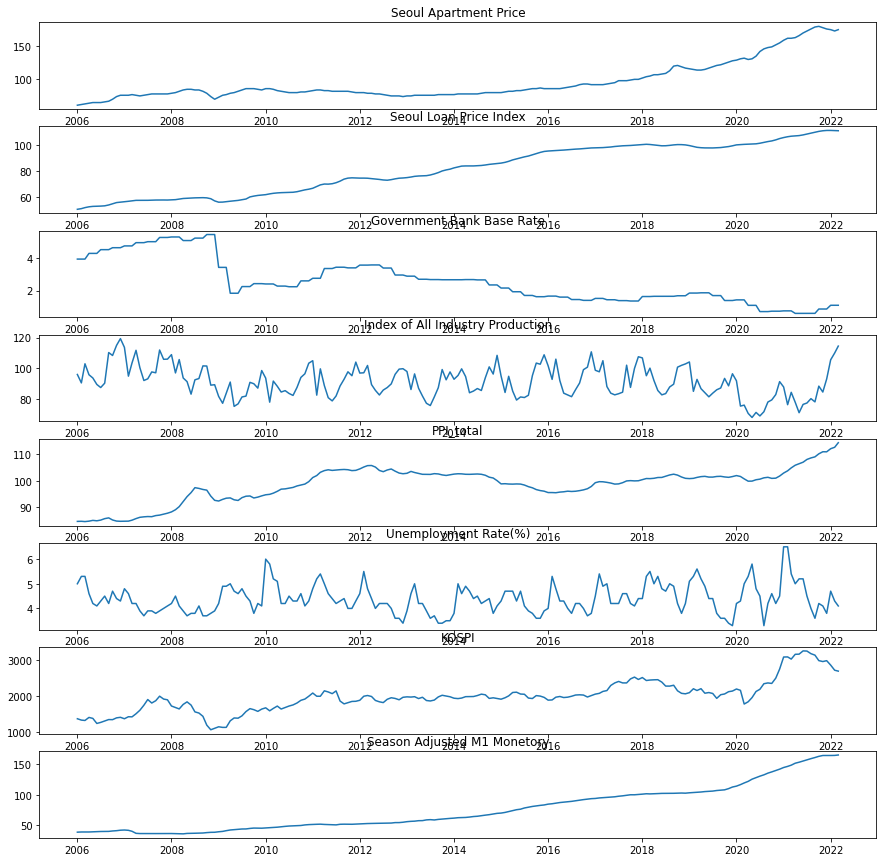

In [ ]:
# 시계열 데이터 시각화
plt.figure(figsize = (15, 15))

ax = plt.subplot(811)
ax.set_title('Seoul Apartment Price')
ax.plot(data.index, data["Price_Seoul"])
ax = plt.subplot(812)
ax.set_title('Seoul Loan Price Index')
ax.plot(data.index, data["Loan_Seoul"])
ax = plt.subplot(813)
ax.set_title('Government Bank Base Rate')
ax.plot(data.index, data["G_BANK"])
ax = plt.subplot(814)
ax.set_title('Index of All Industry Production')
ax.plot(data.index, data["IP"])
ax = plt.subplot(815)
ax.set_title('PPI_total')
ax.plot(data.index, data["PPI_total"])
ax = plt.subplot(816)
ax.set_title('Unemployment Rate(%)')
ax.plot(data.index, data["UR"])
ax = plt.subplot(817)
ax.set_title('KOSPI')
ax.plot(data.index, data["KOSPI"])
ax = plt.subplot(818)
ax.set_title('Season Adjusted M1 Monetory')
ax.plot(data.index, data["M1_M_S"])

## 1. 단위근 검정(ADF)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf_res = pd.DataFrame(columns = ['ADF_statistic', 'p-value', 'CV1%', 'CV5%', 'CV10%'])

def adf_statistics(time_series) : 
    result = adfuller(time_series.values)
    temp = list(result[4].values())
    res = [result[0], result[1]]
    res.extend(temp)
    return res

for i in data : 
  add_row = adf_statistics(data[i])
  adf_res.loc[i] = add_row

In [ ]:
adf_res['p-value'] = adf_res['p-value'].round(5)
adf_res

,ADF_statistic,p-value,CV1%,CV5%,CV10%
Price_Seoul,2.304998,0.99896,-3.464875,-2.876714,-2.574859
Loan_Seoul,-0.204862,0.93794,-3.466398,-2.877380,-2.575214
G_BANK,-1.847344,0.35722,-3.466201,-2.877293,-2.575168
M1_M_S,1.348309,0.99687,-3.465059,-2.876794,-2.574901
IP,-3.571251,0.00634,-3.467420,-2.877826,-2.575452
PPI_total,-0.644032,0.86072,-3.464875,-2.876714,-2.574859
UR,-3.319997,0.01401,-3.467211,-2.877735,-2.575403
KOSPI,-1.729144,0.41616,-3.464694,-2.876635,-2.574816


### 단위근 검정 결론
변수 간 단위근이 존재한다. 즉, 시계열 데이터가 비정상성을 띄고 있다.

## 로그 변환, 차분
비정상 시계열을 정상적 시계열로 변환하기 위해 로그변환, 차분을 진행한다.

In [ ]:
data = np.log(data).diff()

In [ ]:
# null 값들 삭제
data.replace([np.inf, -np.inf], np.nan, inplace = True)
data = data.dropna()

In [ ]:
# 단위근 검정
adf_res = pd.DataFrame(columns = ['ADF_statistic', 'p-value', 'CV1%', 'CV5%', 'CV10%'])
for i in data : 
  add_row = adf_statistics(data[i])
  adf_res.loc[i] = add_row

adf_res['p-value'] = adf_res['p-value'].round(5)
adf_res

,ADF_statistic,p-value,CV1%,CV5%,CV10%
Price_Seoul,-7.623028,0.00000,-3.464875,-2.876714,-2.574859
Loan_Seoul,-3.769056,0.00324,-3.466398,-2.877380,-2.575214
G_BANK,-3.433887,0.00986,-3.466201,-2.877293,-2.575168
M1_M_S,-3.916228,0.00192,-3.465431,-2.876957,-2.574988
IP,-3.249087,0.01731,-3.467005,-2.877644,-2.575355
PPI_total,-6.742417,0.00000,-3.464875,-2.876714,-2.574859
UR,-4.035378,0.00124,-3.467005,-2.877644,-2.575355
KOSPI,-6.807149,0.00000,-3.465059,-2.876794,-2.574901


### 단위근 검정 결론
모든 변수들이 정상적 시계열 데이터로 변환하여, 1차 차분한 데이터로 시계열 분석을 이어간다.

## 그래인저 인과 분석

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import select_order
import seaborn as sns

In [ ]:
# AIC, SC(= BIC)를 통해 적정 시차를 찾아낸다
lag_order = select_order(data=data, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-

,AIC,BIC,FPE,HQIC
0,-61.25,-59.42*,2.518e-27,-60.51*
1,-61.09,-58.15,2.961e-27,-59.90
2,-61.06,-56.99,3.092e-27,-59.41
3,-61.30,-56.11,2.504e-27,-59.19
4,-61.52,-55.21,2.070e-27*,-58.97
5,-61.49,-54.05,2.270e-27,-58.47
6,-61.38,-52.82,2.717e-27,-57.91
7,-61.48,-51.80,2.725e-27,-57.56
8,-61.69,-50.89,2.513e-27,-57.31
9,-61.93,-50.01,2.347e-27,-57.10


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


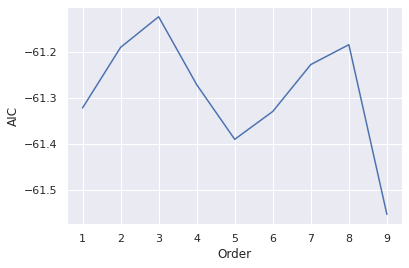

[-61.3216886698369, -61.189657559794234, -61.12300723257057, -61.2708652249546, -61.39003341242402, -61.32924551992065, -61.22710342236114, -61.18384363790872, -61.553551728362606]


In [ ]:
# AIC 시각화
forecasting_model = VAR(data)
results_aic = []
for i in range(1,10):
    results = forecasting_model.fit(i)
    results_aic.append(results.aic)
    
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()
print(results_aic)

In [ ]:
lag_order.aic

10

In [ ]:
# 적정시차 (AIC값에 따라) 10으로 그래인저 인과분석 진행
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = lag_order.aic
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables=data.columns)

,Price_Seoul_x,Loan_Seoul_x,G_BANK_x,M1_M_S_x,IP_x,PPI_total_x,UR_x,KOSPI_x
Price_Seoul_y,1.0000,0.0262,0.0091,0.0489,0.1613,0.0000,0.0844,0.0000
Loan_Seoul_y,0.0000,1.0000,0.0000,0.0926,0.0592,0.0008,0.2430,0.0001
G_BANK_y,0.0009,0.0000,1.0000,0.0313,0.0229,0.0000,0.0033,0.0039
M1_M_S_y,0.0015,0.0222,0.0639,1.0000,0.1495,0.4141,0.3755,0.0197
IP_y,0.0037,0.0000,0.0200,0.0413,1.0000,0.0013,0.0000,0.1411
PPI_total_y,0.0065,0.1615,0.5282,0.1619,0.1266,1.0000,0.4379,0.0085
UR_y,0.0911,0.0063,0.0011,0.2013,0.0000,0.0370,1.0000,0.1200
KOSPI_y,0.5644,0.3168,0.0215,0.2667,0.0057,0.0027,0.1998,1.0000


In [ ]:
# 적정시차를 활용한 예측
results = forecasting_model.fit(lag_order.aic)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 11, Jun, 2022
Time:                     07:17:40
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -50.4824
Nobs:                     184.000    HQIC:                  -57.2155
Log likelihood:           4245.34    FPE:                2.41521e-27
AIC:                     -61.8045    Det(Omega_mle):     1.30476e-28
--------------------------------------------------------------------
Results for equation Price_Seoul
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.003465         0.001957            1.771           0.077
L1.Price_Seoul          0.549768         0.101429            5.420           0.000
L1.Loan_Seoul           0.017766         0.383

## 충격 반응 모형

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


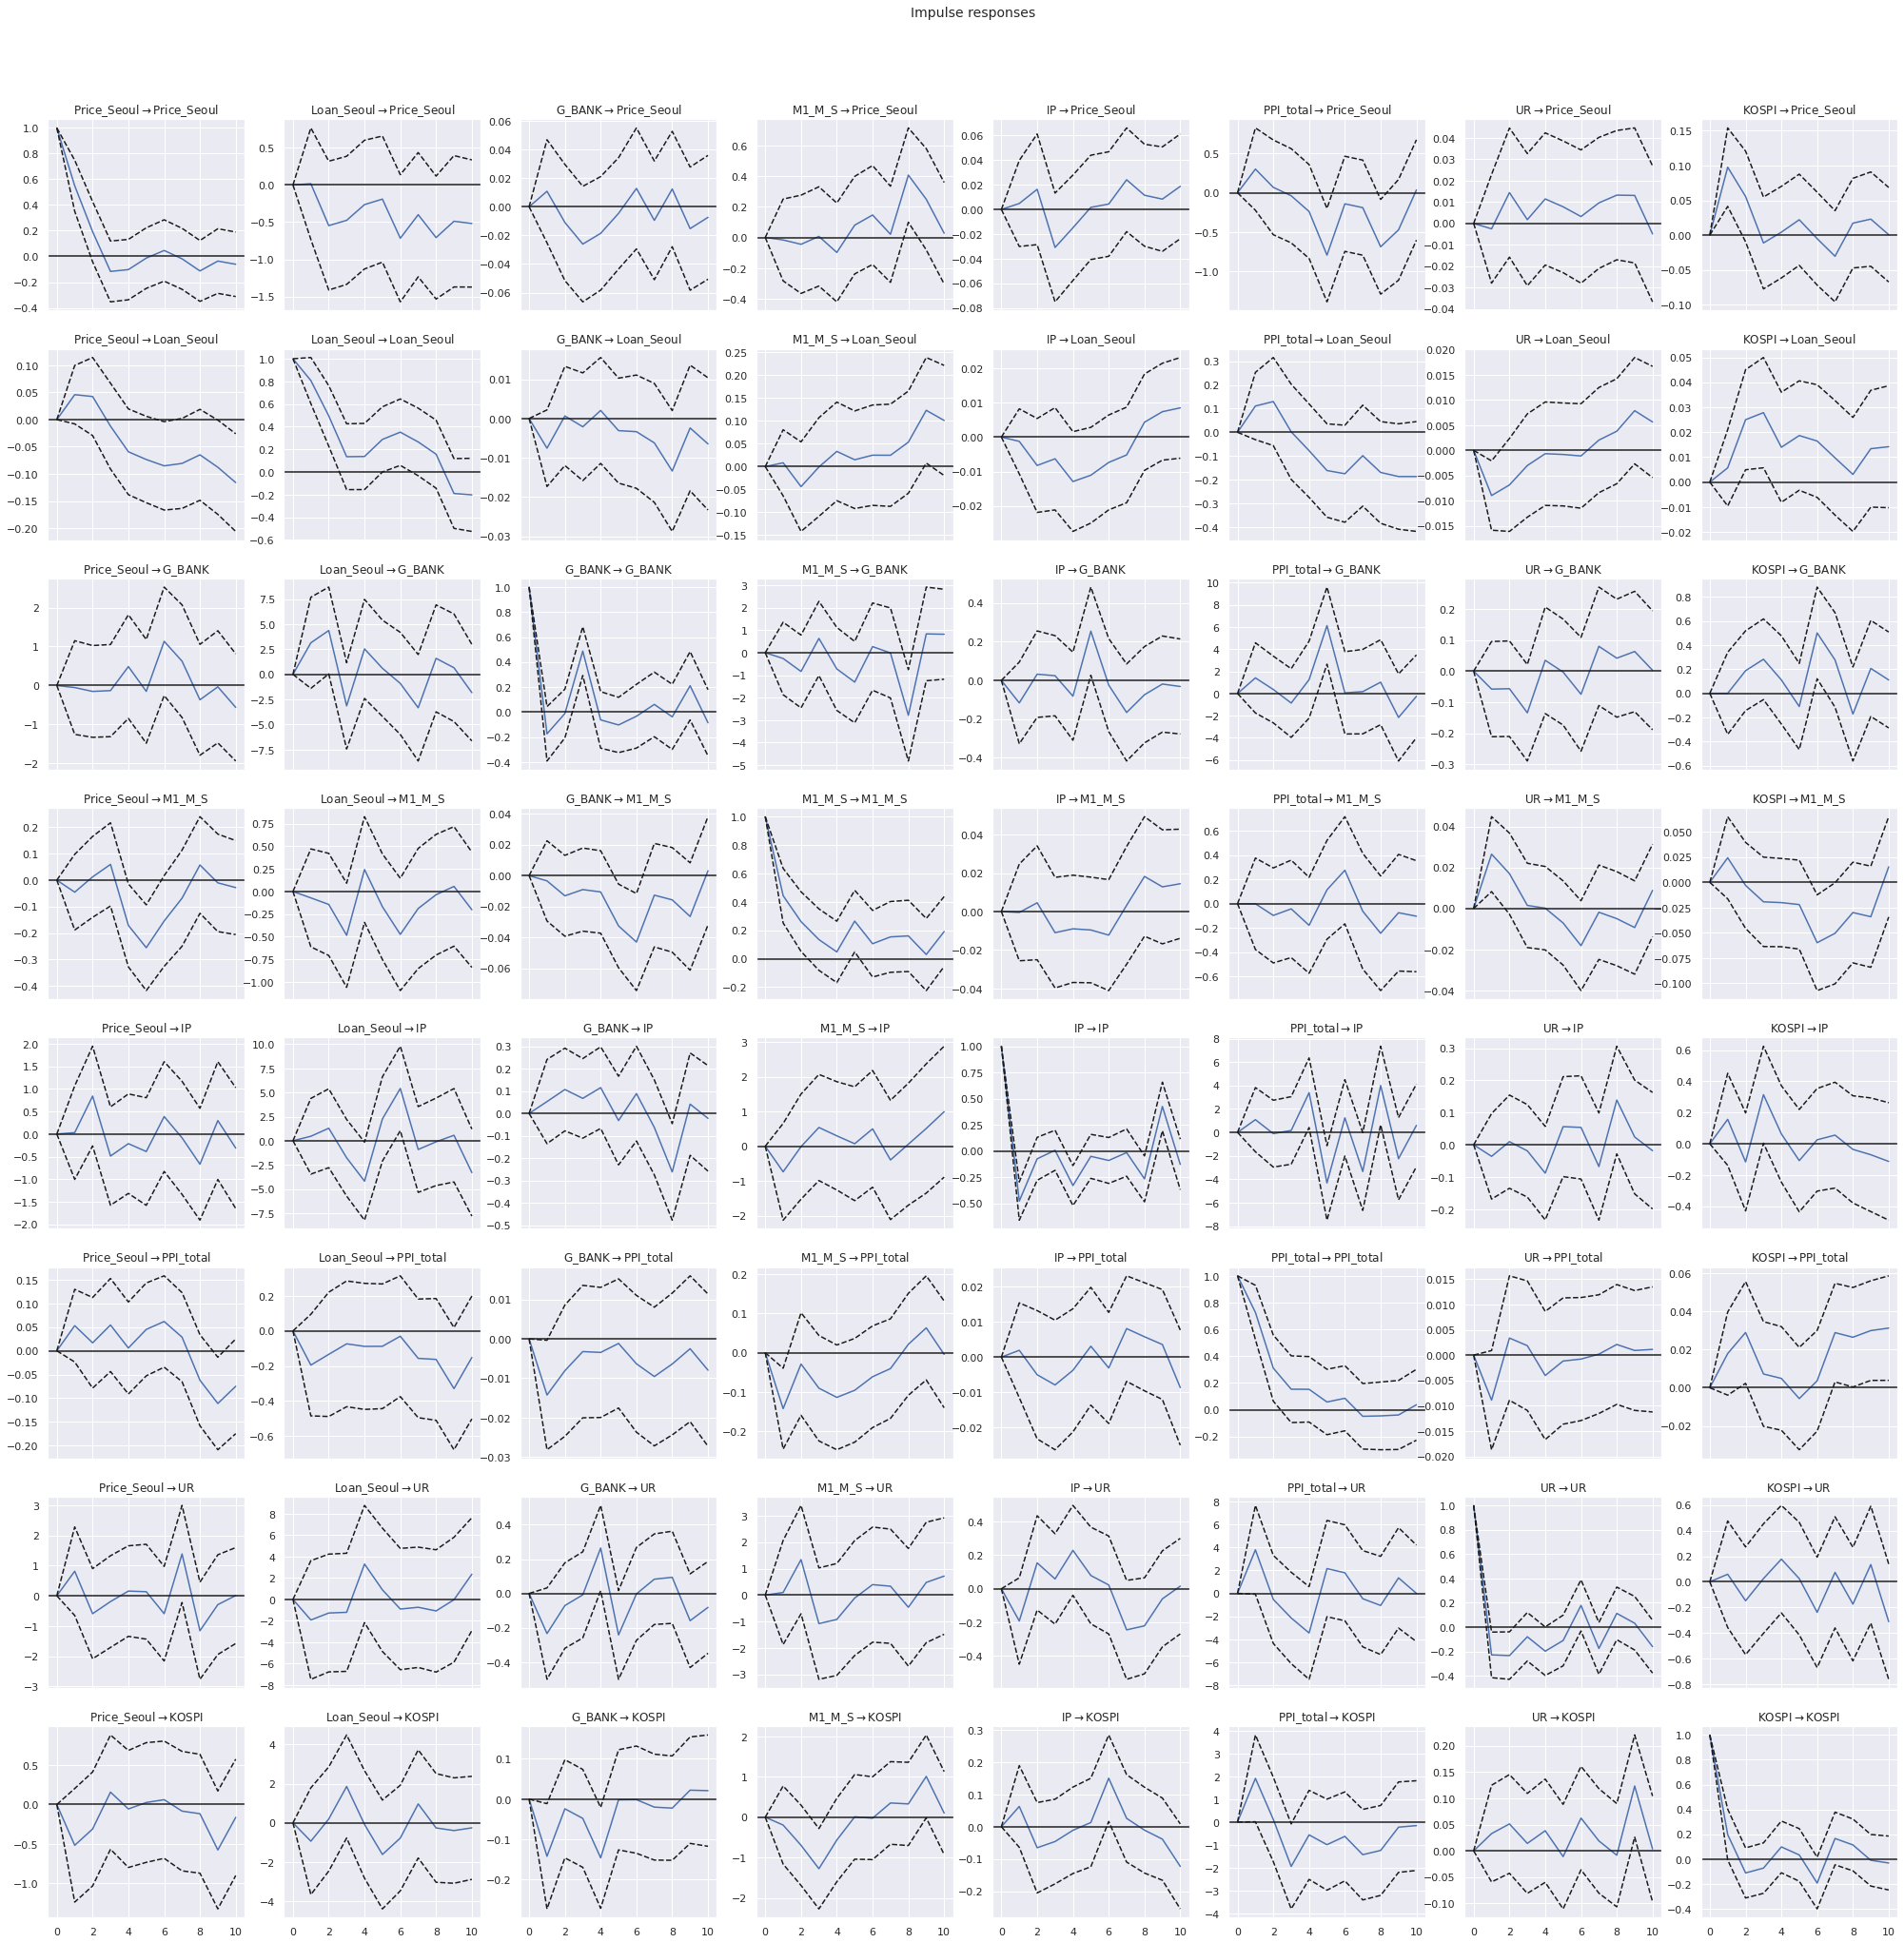

In [ ]:
irf = results.irf(lag_order.aic)
fig= irf.plot(orth=False)
fig.tight_layout()
fig.set_figheight(30)
fig.set_figwidth(30)

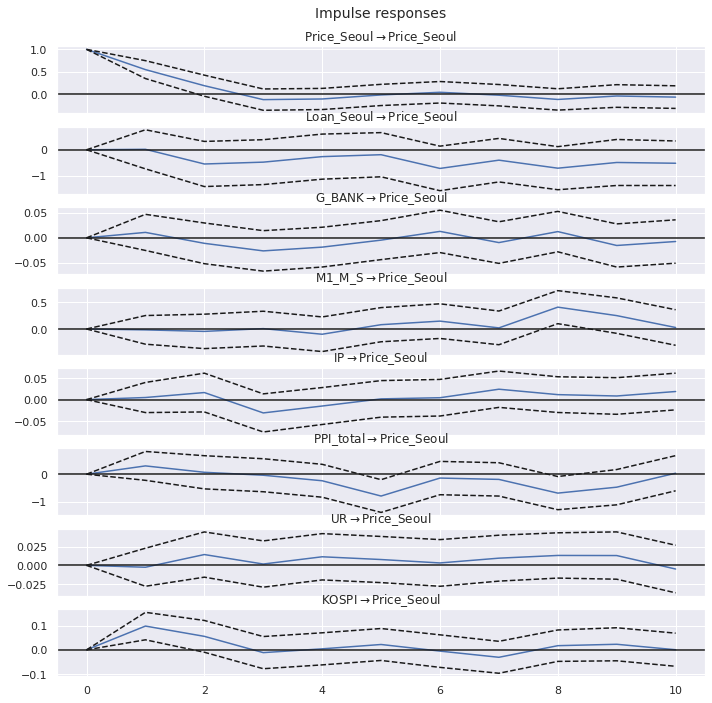

In [ ]:
irf.plot(response='Price_Seoul',plot_params=True)
fig.set_figheight(30)
fig.set_figwidth(30)

## 예측오차 분산분해

In [ ]:
fevd = results.fevd(lag_order.aic)
fevd.summary()

FEVD for Price_Seoul
     Price_Seoul  Loan_Seoul    G_BANK    M1_M_S        IP  PPI_total        UR     KOSPI
0       1.000000    0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000
1       0.902664    0.001608  0.001570  0.005000  0.004479   0.016471  0.000679  0.067529
2       0.859252    0.014527  0.003628  0.006855  0.010219   0.016733  0.006226  0.082561
3       0.825690    0.019902  0.020806  0.006574  0.025569   0.016133  0.006036  0.079289
4       0.804819    0.021596  0.029002  0.008848  0.029894   0.019596  0.009570  0.076675
5       0.757923    0.024762  0.037377  0.008881  0.028844   0.056865  0.010469  0.074879
6       0.736322    0.044051  0.037192  0.014345  0.028069   0.056676  0.010460  0.072884
7       0.722181    0.045499  0.037196  0.015148  0.031826   0.059011  0.012913  0.076225
8       0.661853    0.063426  0.035776  0.045886  0.028812   0.078514  0.015528  0.070204
9       0.629193    0.067845  0.048750  0.054146  0.027452   0.085225  0.018286

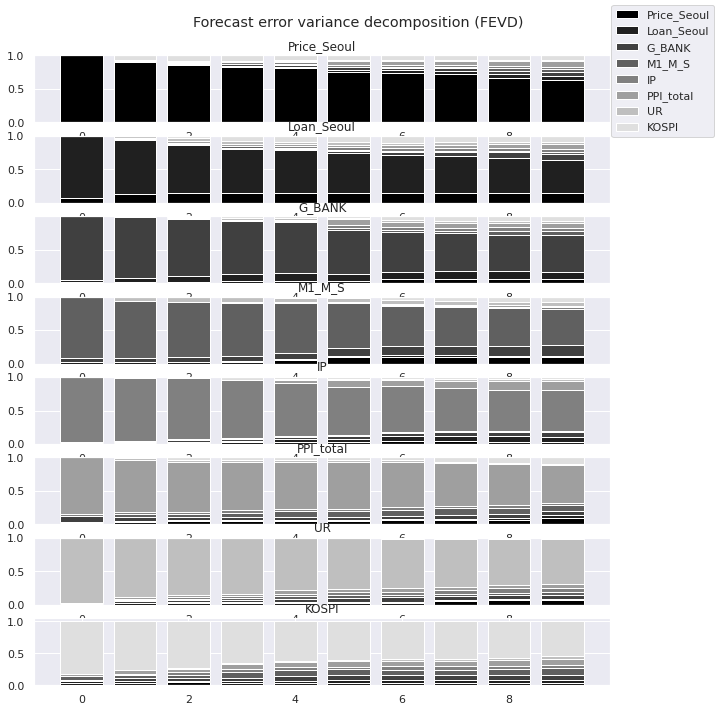

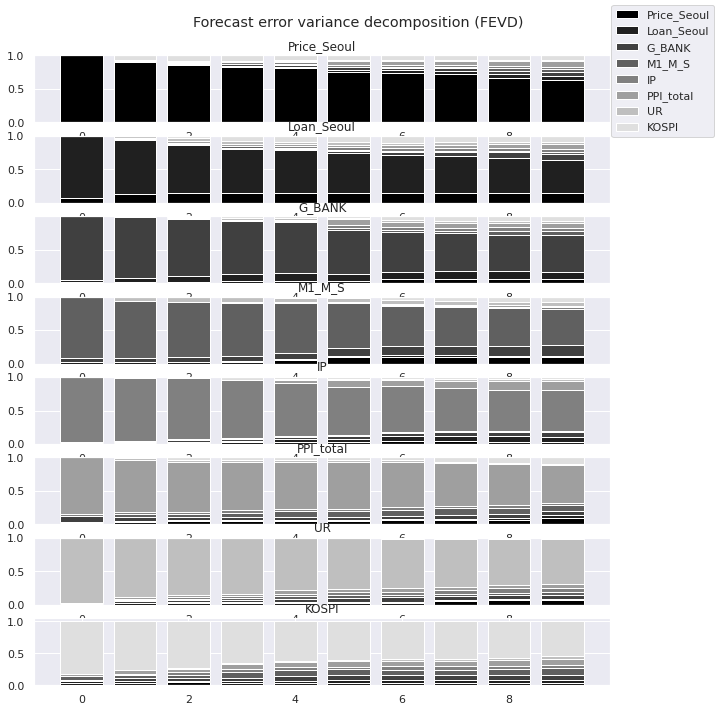

In [ ]:
# fevd 결과를 시각화
results.fevd(lag_order.aic).plot()

## 가격 예측 - ARIMA

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/통데분 4조/분석자료/dataset_전처리.xlsx')
data.set_index('DATE', inplace = True)
data = data[['Price_Seoul', 'Loan_Seoul', 'G_BANK', 'M1_M_S', 'IP', 'PPI_total', 'UR', 'KOSPI']]
data_origin = data

data = np.log(data).diff()
data.replace([np.inf, -np.inf], np.nan, inplace = True)
data = data.dropna()

Text(0, 0.5, 'Price_Seoul')

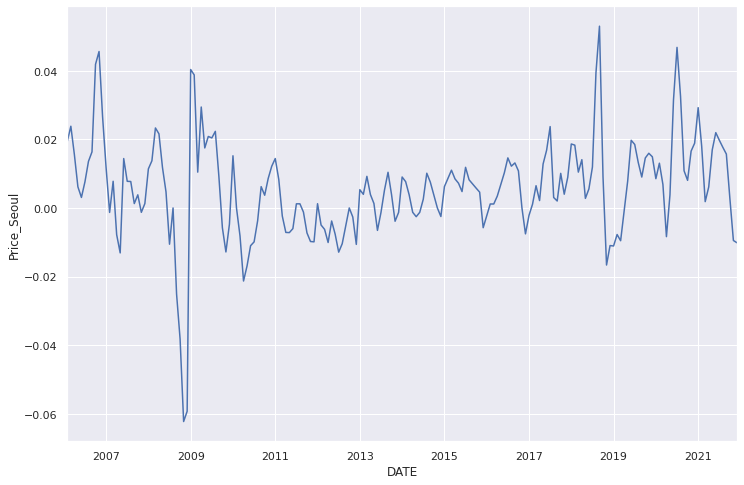

In [ ]:
# 차분한 종속변수 (서울 아파트 매매가격) 시각화
data['Price_Seoul'].plot(figsize=(12, 8))
plt.ylabel("Price_Seoul")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


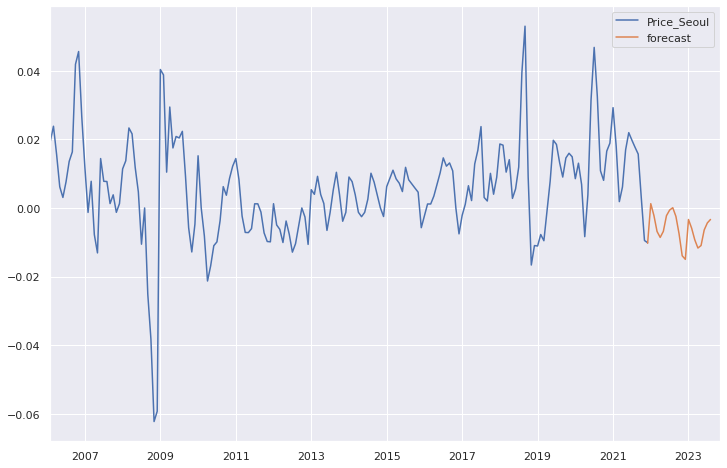

In [ ]:
# 차분한 데이터로 ForeCasting 시각화

import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

model=sm.tsa.statespace.SARIMAX(data['Price_Seoul'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
results=model.fit()

future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

future_datest_df.tail()
future_df=pd.concat([data, future_datest_df])

future_df['forecast'] = results.predict(start = 190, end = 210, dynamic= True)
future_df[['Price_Seoul', 'forecast']].plot(figsize=(12, 8))

Text(0, 0.5, 'Price_Seoul')

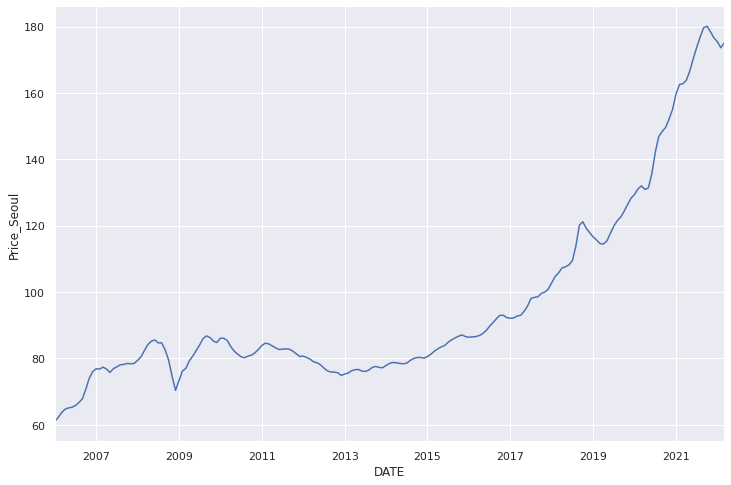

In [ ]:
# 차분 진행하지 않았던 원본 데이터로 최종 시각화
data_origin['Price_Seoul'].plot(figsize=(12, 8))
plt.ylabel("Price_Seoul")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


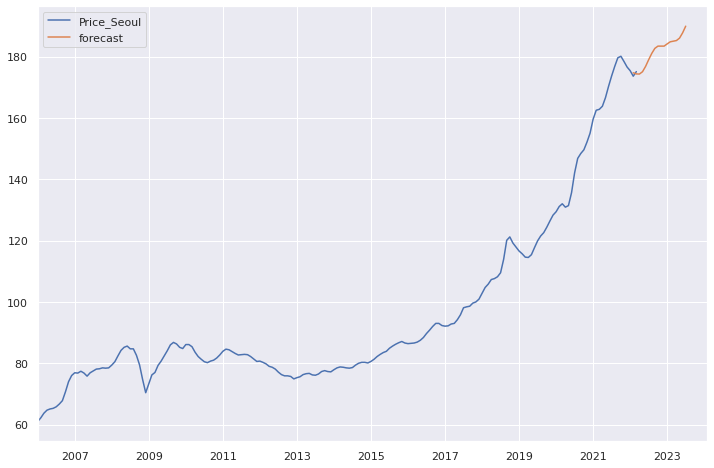

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_origin['Price_Seoul'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
results=model.fit()

from pandas.tseries.offsets import DateOffset
future_dates=[data_origin.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

future_datest_df.tail()
future_df=pd.concat([data_origin, future_datest_df])

future_df['forecast'] = results.predict(start = 193, end = 210, dynamic= True)
future_df[['Price_Seoul', 'forecast']].plot(figsize=(12, 8))